In [1]:
import torch
import numpy as np
import gymnasium as gym

import sys
sys.path.append('../')
from tools.trainer import Trainer
from tools.logger import Logger
from environments.hockey_wrapper import HockeyWrapper
from TD3 import TD3Agent
import laserhockey.hockey_env as h_env

In [2]:
env_string = "LunarLanderContinuous-v2"

In [3]:
if env_string == "Hockey":
    env = HockeyWrapper(mode="normal", opponent="mixed", add_opponents=True)
else:
    env = gym.make(env_string)

In [4]:
agent = TD3Agent(env.observation_space, env.action_space)
trainer = Trainer()

In [5]:
# logger = Logger(2000, 100)
# logger.load('logs/pendulum_tau_0_0004.npy')
# logger.plot()

In [6]:
# player = h_env.BasicOpponent(weak=False)
player = agent

In [7]:
# state = torch.load("checkpoint_hockey.pth")
# agent.restore_state(state)
# logger = Logger(30000, 100)
# logger.load("logs/hockey_strong.npy")
# trainer.logger = logger

In [8]:
ep_rewards = trainer.train(env, agent, n_episodes=5000, test_every=100, noise=0.2, player=player, mixed=False)

Step 100/5000:
                    test reward: -60.70
                    mean reward: -281.19, max reward: 182.52
                    Avg. step count: 138.5, Avg ep duration: 0.046s
                    Avg. critic loss: 1.78, Avg. actor loss: 3.23
                    Avg. train duration: 0.462s
                    
            
Step 200/5000:
                    test reward: -20.72
                    mean reward: -233.66, max reward: 241.67
                    Avg. step count: 194.0, Avg ep duration: 0.064s
                    Avg. critic loss: 1.20, Avg. actor loss: 2.04
                    Avg. train duration: 0.456s
                    
            
Step 300/5000:
                    test reward: 75.33
                    mean reward: -93.03, max reward: 180.77
                    Avg. step count: 154.7, Avg ep duration: 0.049s
                    Avg. critic loss: 1.15, Avg. actor loss: -0.34
                    Avg. train duration: 0.456s
                    
            
Step 

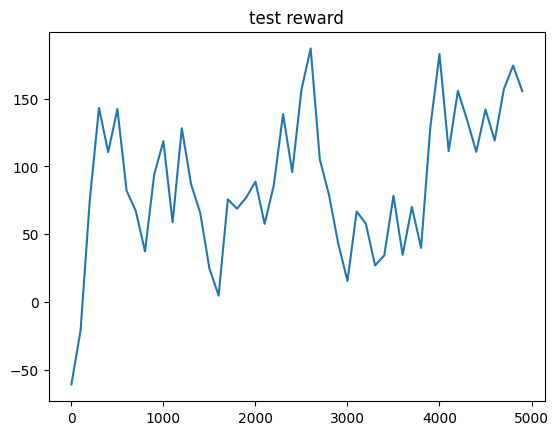

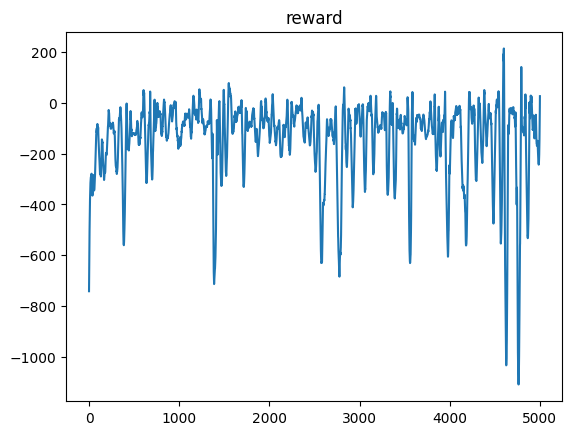

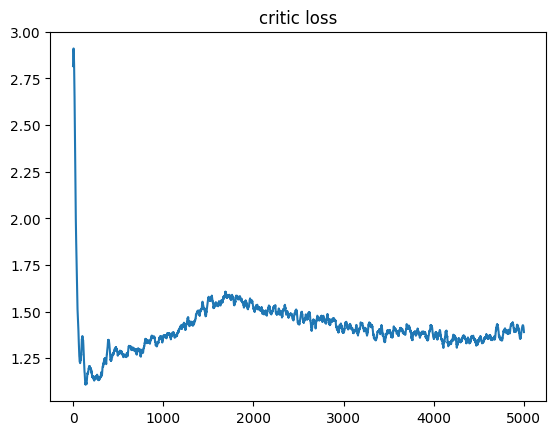

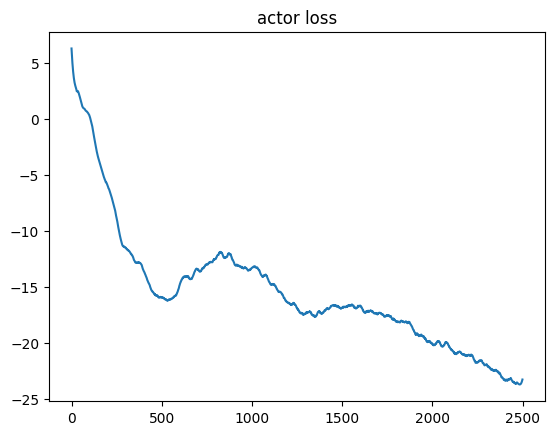

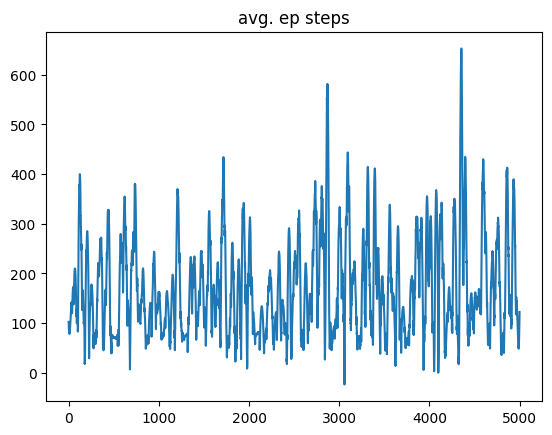

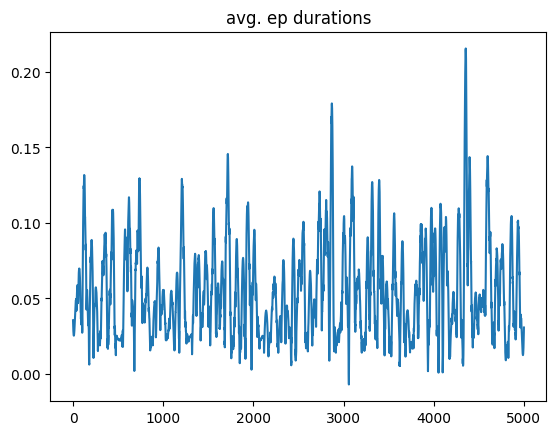

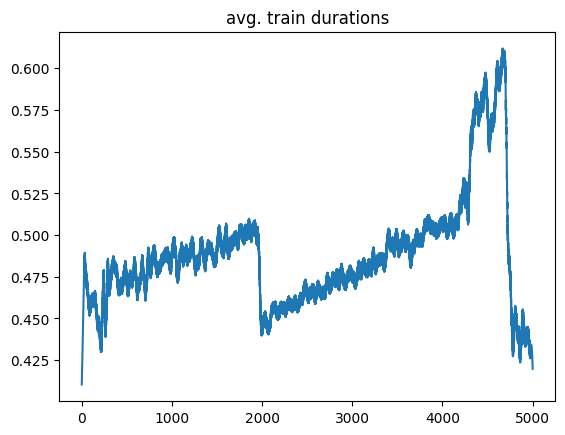

In [17]:
trainer.logger.plot()

In [18]:
def play(env_string, agent, n_episodes=10, noise=0, opponent='strong', render=None):
    if env_string == 'Hockey':
        env = HockeyWrapper(mode='normal', opponent=opponent)
        if render is None:
            render = True
    else:
        env = gym.make(env_string, render_mode='human')
        render = False
    # player = h_env.BasicOpponent(weak=False)
    player = agent
    steps, rewards, observations, actions, results = Trainer.run(env, player, n_episodes=n_episodes, noise=noise, render=render, store_transitions=False, hockey=env_string=='Hockey')
    env.close()
    return steps, rewards, observations, actions, results

In [19]:
test_opp = h_env.BasicOpponent(weak=False)
# test_opp = env.opponent_list[3]

In [12]:
# steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=1, noise=0, render=True, opponent=test_opp)
# print(np.mean(rewards))
# print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

In [13]:
# steps, rewards, observations, actions, results = play(env_string, agent, n_episodes=100, noise=0, render=False, opponent=test_opp)
# print(np.mean(rewards))
# # print(np.mean(results==1), np.mean(results==0), np.mean(results==-1))

In [20]:
trainer.logger.save("logs/lunar_tau_0_005.npy")

In [21]:
torch.save(agent.state(), 'checkpoint_lunar_tau_0_005.pth')

In [16]:
# agent_state = torch.load('checkpoint_hockey.pth')
# agent.restore_state(agent_state)